### Содержание:<br>
Шаг 1. Подготовка данных<br>
Шаг 2. Провести исследовательский анализ данных (EDA)<br>
Шаг 3. Постройте модель прогнозирования оттока клиентов<br>
Шаг 4. Сделать кластеризацию клиентов<br>
Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами<br>

### Описание исследования:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

### Описание данных:

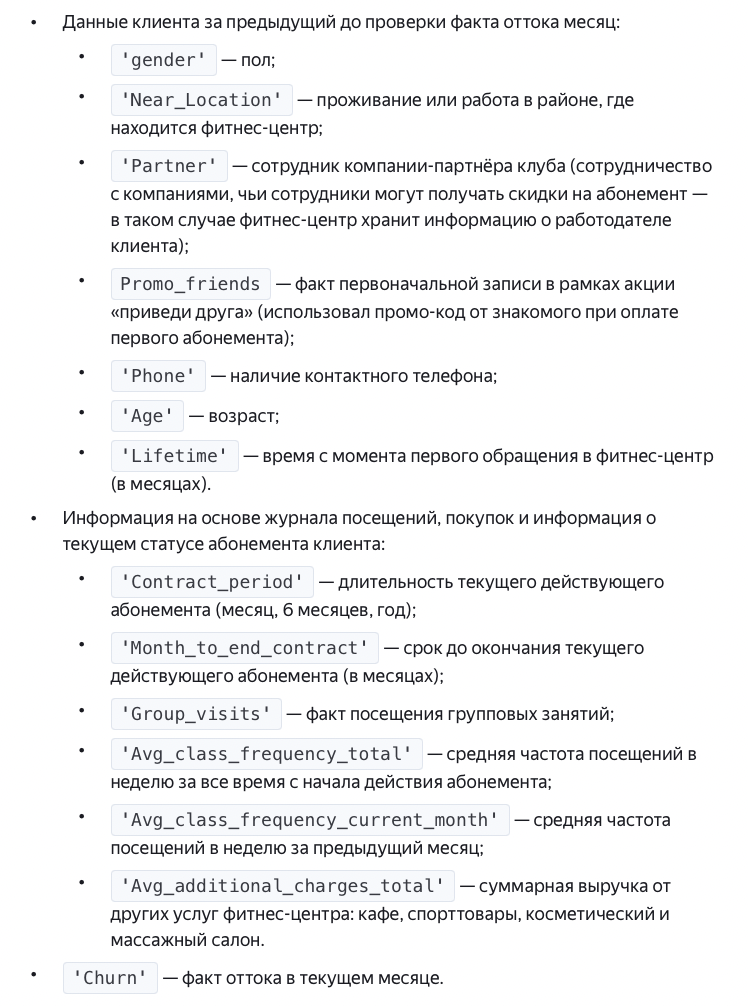

### План исследования:

Шаг 1. Подготовка данных
- импортировать  необходимые библиотеки
- подгрузить датасет “gym_churn.csv”
- ознакомиться с данными 
- проверить данные на пропуски и дубликаты
- привести название столбцов к единому стилю
- изменить типы данных в столбцах для удобства работы
- сделать промежуточные выводы

Шаг 2. Провести исследовательский анализ данных (EDA)
- узнать, есть ли в датасете отсутствующие признаки
- изучить средние значения в датасете
- определить стандартные отклонения (метод describe)
- Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (метод groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

Шаг 3. Постройте модель прогнозирования оттока клиентов
- Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Шаг 4. Сделать кластеризацию клиентов
- стандартизировать данные
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Построить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. (Число кластеров n=5)
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

# Шаг 1. Подготовка данных

### импортировать необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

pd.options.display.float_format = '{:,.2f}'.format

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
import itertools

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

### подгрузить датасет “gym_churn.csv”

In [2]:
try:
    gym = pd.read_csv('/datasets/gym_churn.csv')
except:
    gym = pd.read_csv('gym_churn.csv')

### ознакомиться с данными

In [3]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0


In [4]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### проверить данные на пропуски и дубликаты

In [6]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
gym.duplicated().sum()

0

### привести название столбцов к единому стилю

In [8]:
gym.columns = gym.columns.str.lower()

In [9]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### изменить типы данных в столбцах для удобства работы

In [10]:
# gym['gender'] = gym['gender'].astype('bool')
# gym['near_location'] = gym['near_location'].astype('bool')
# gym['partner'] = gym['partner'].astype('bool')
# gym['promo_friends'] = gym['promo_friends'].astype('bool')
# gym['phone'] = gym['phone'].astype('bool')
# gym['group_visits'] = gym['group_visits'].astype('bool')
# gym['churn'] = gym['churn'].astype('bool')

gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

In [11]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### сделать промежуточные выводы

Во время подготовки данных были импортированы все необходимые библиотеки. После этого мы подгрузили документ /datasets/gym_churn.csv, с которым первично ознакомились. Таблица состоит из 14 столбцов и 4000 строк. В данной таблице оказались сведения о поле клиентов, близости проживания, компании-партнере, участия в акции “Приведи друга”, телефонном номере, периоде действия контракта, посещении групповых занятий, возрасте, дополнительных списаниях, количестве месяцев до окончания действия контракта, времени, с момента первого обращения в фитнес-центр, средней частоте посещений зала в неделю, суммарной выручке от других услуг фитнес-центра, а также факт оттока в текущем месяце. После этого мы выяснили, что пропущенные значения в таблице отсутствуют, также как и дубликаты. Столбцы в таблице были приведены к единому стилю. Типы данных в столбцах были изменены для удобства дальнейшей работы. 

Данные подготовлены для дальнейшей работы.

# Шаг 2. Провести исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [12]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


### Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (метод groupby());

In [13]:
gym.groupby('churn').agg('mean').T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [14]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
numerical_values = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

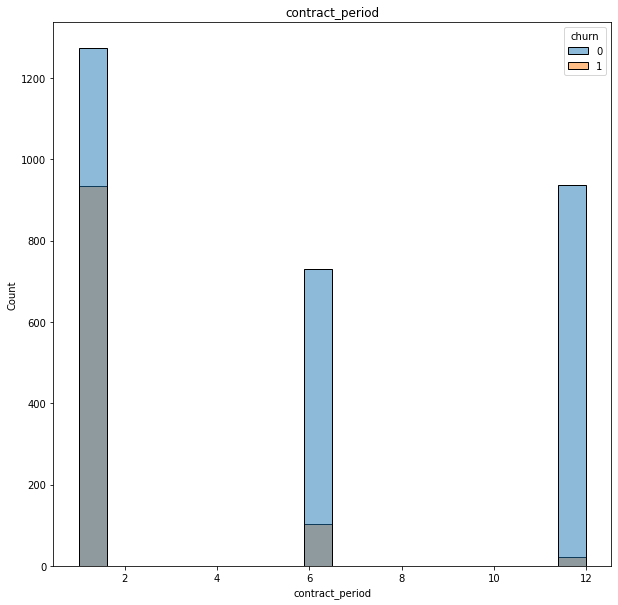

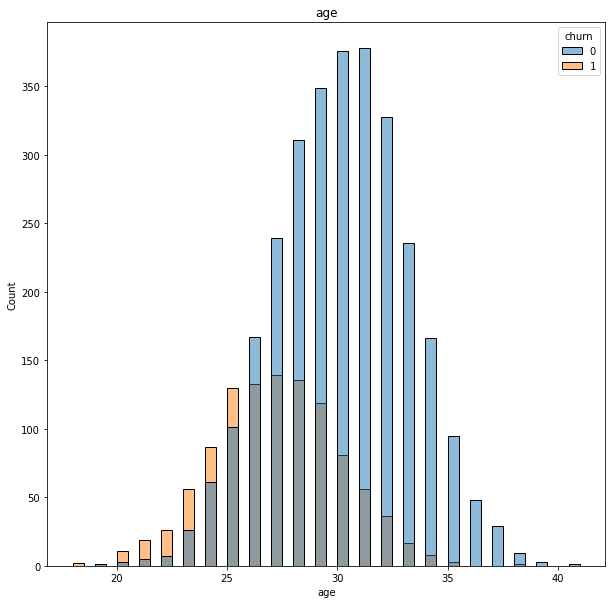

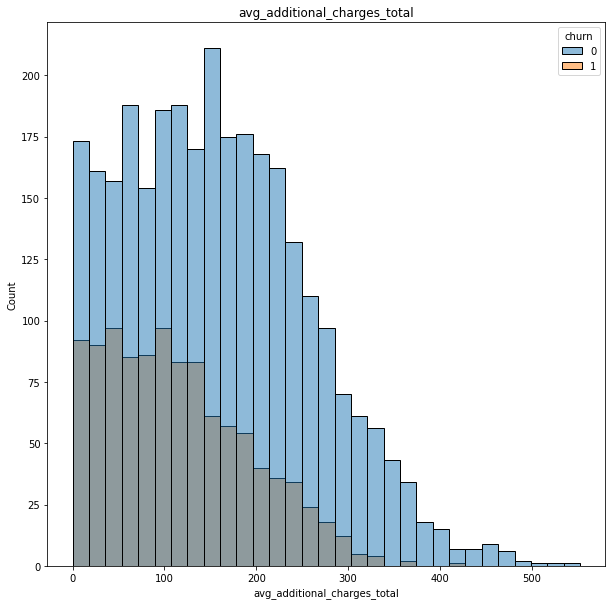

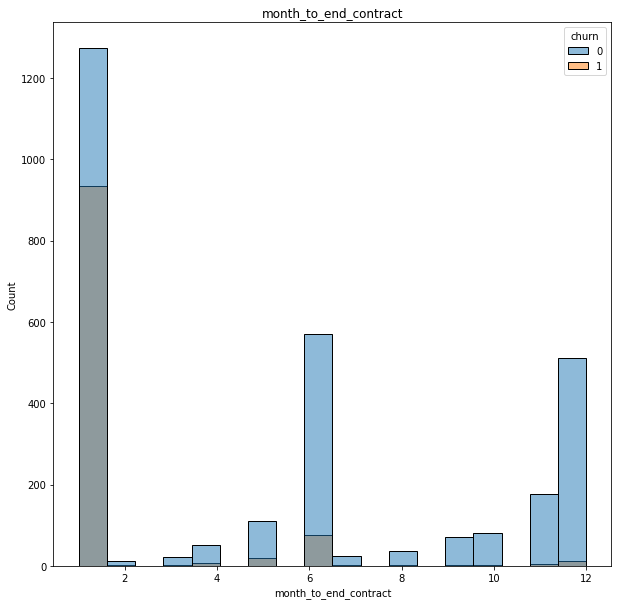

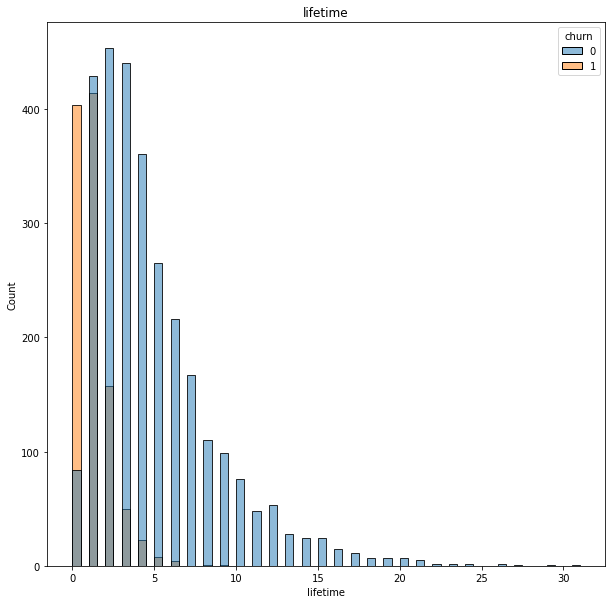

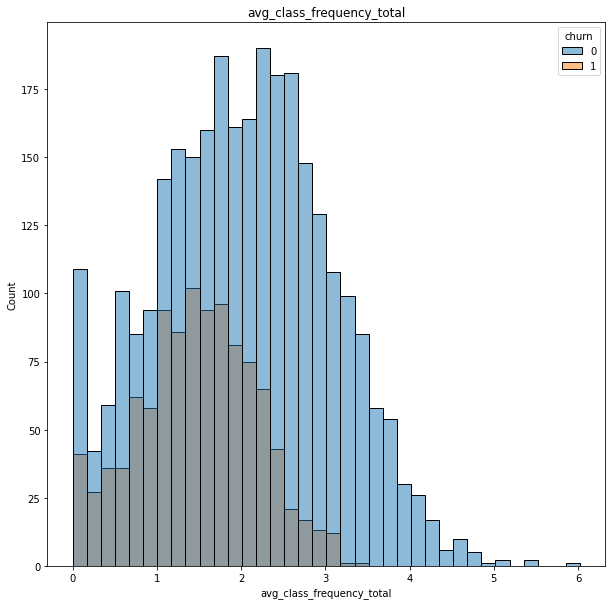

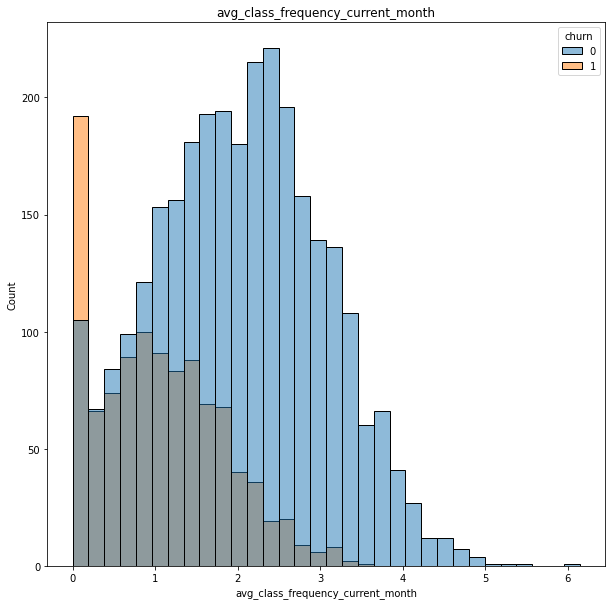

In [15]:
for col in numerical_values:
    plt.figure(figsize=(10, 10))
    gym.groupby('churn')[col]
    sns.histplot(x=gym[col], hue='churn', data=gym)
    plt.title(col)
    plt.show()

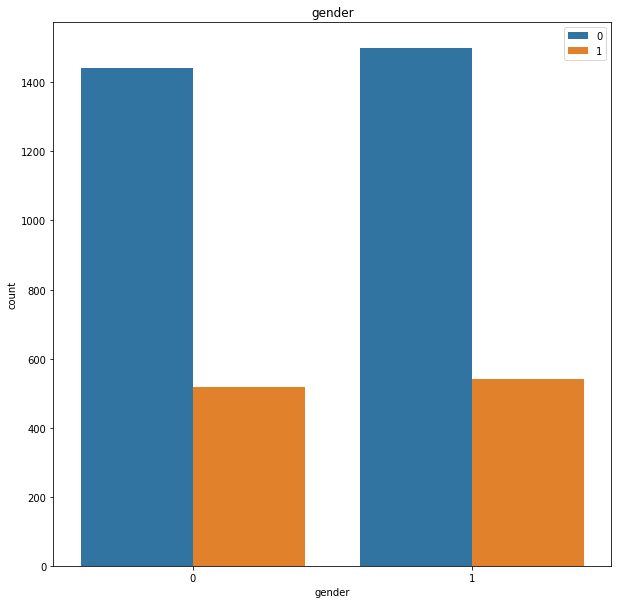

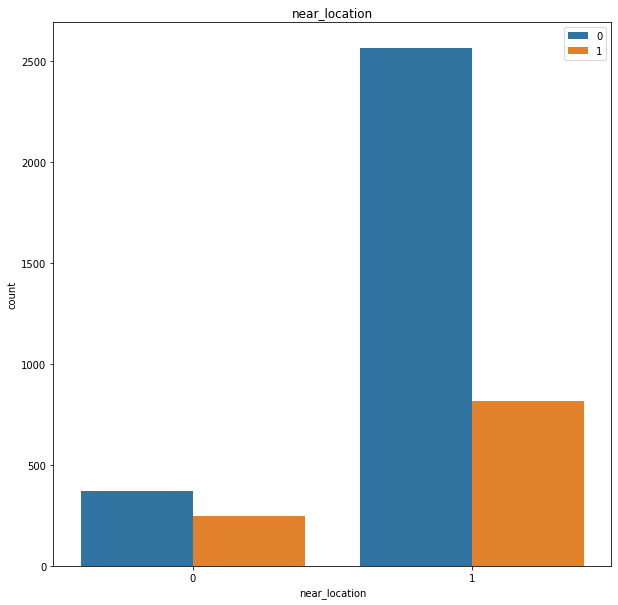

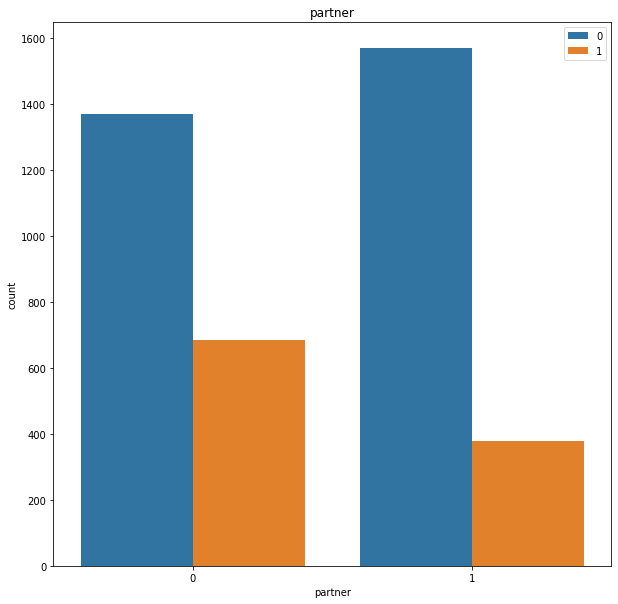

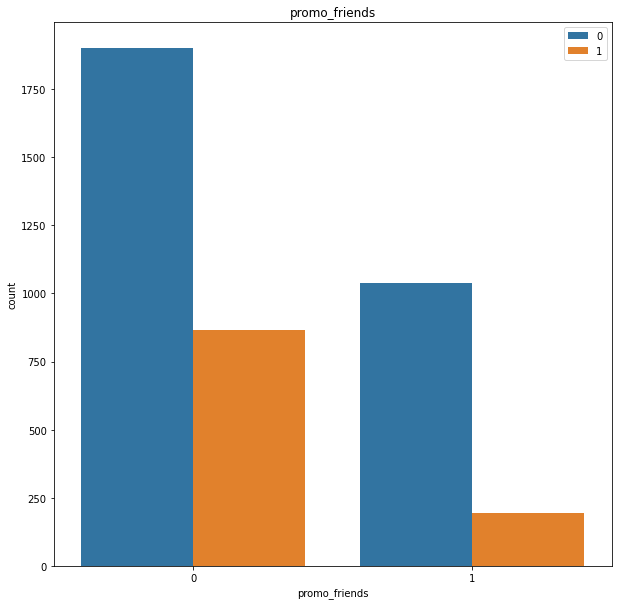

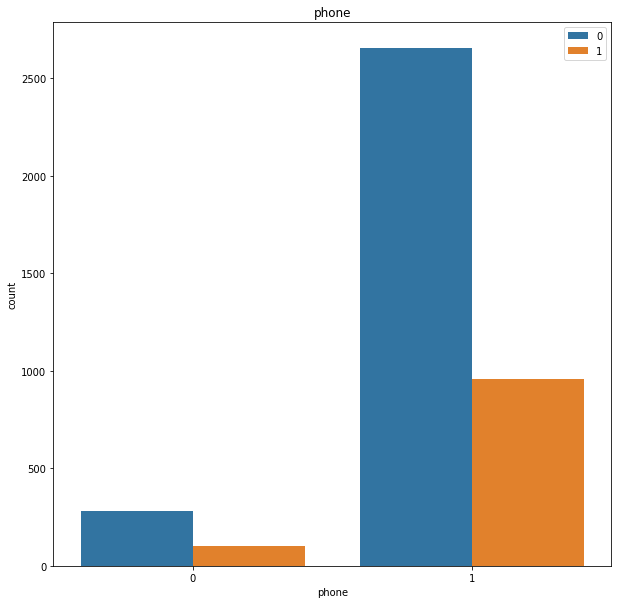

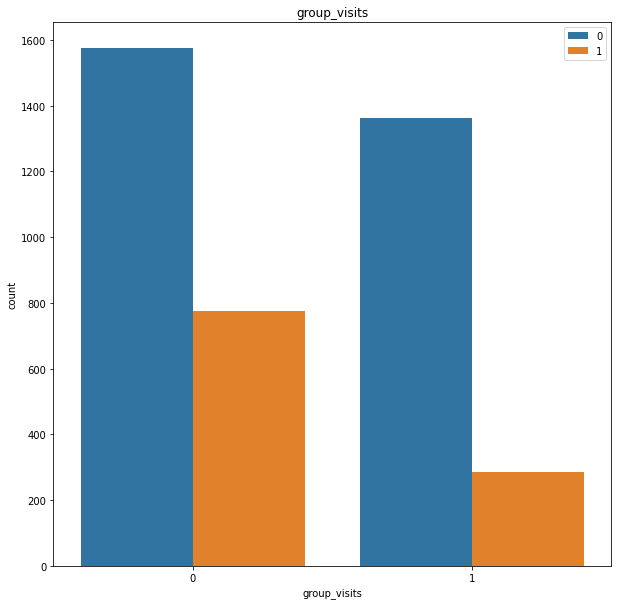

In [16]:
#построим попарные диаграммы рассеяния признак-целевая переменная для каждого признака
for col in categorical_columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=gym[col], hue='churn', data=gym)
    plt.title(col)
    plt.legend()
    plt.show()

### Постройте матрицу корреляций и отобразите её.

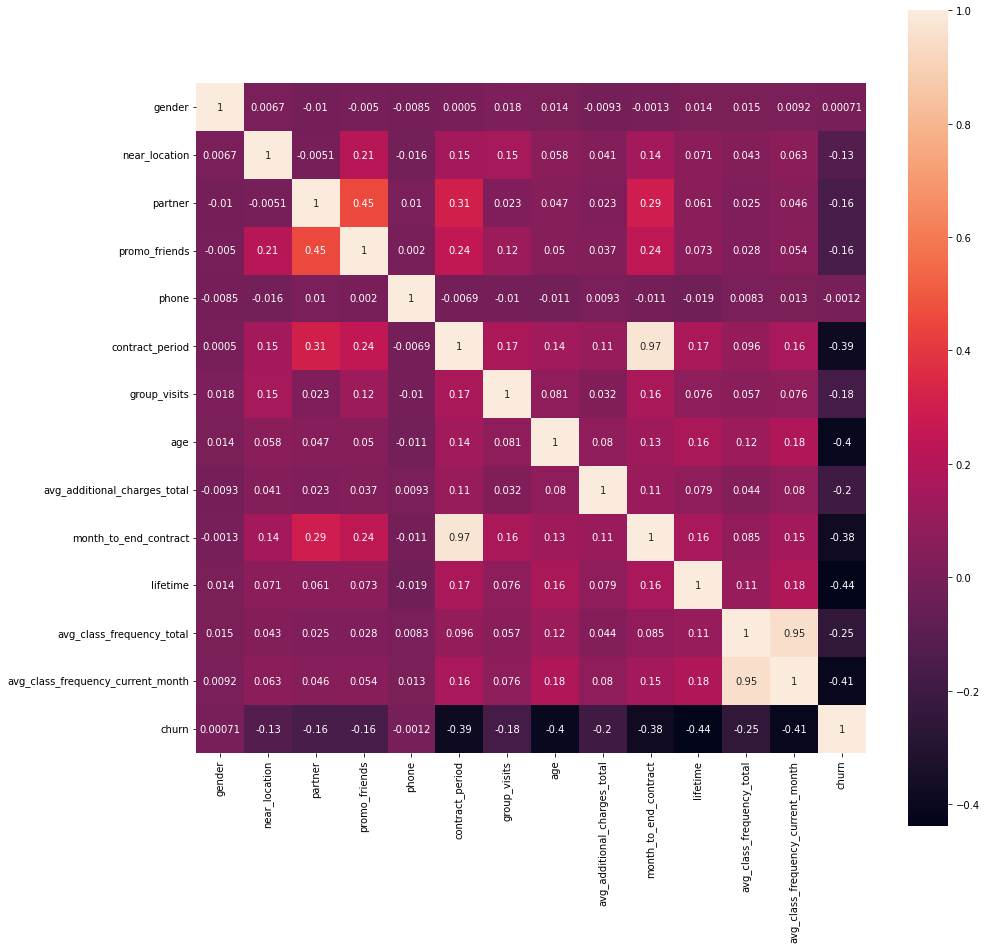

In [17]:
gym_corr = gym.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=gym_corr, square=True, annot=True)
plt.show()

### сделать промежуточные выводы

Во время проведения исследовательского анализа мы выяснили, что:
- пол клиента не влияет на отток клиентов
- клиенты, которые живут близко проявляют больше лояльности и остаются с компанией
- клиенты от компаний-партнёров дольше остаются с компанией
- клиенты, которых пригласили друзья более лояльно относятся к компании
- наличие контактного телефона клиента не влияет на отток
- клиенты, у которых контракт заключён на больший срок продолжают свои тренировки и остаются с компанией
- клиенты, посещающие групповые тренировки более лояльно относятся к компании
- средний возраст людей, которые попадают в “отток” чуть меньше среднего возраста людей, которые остаются с компанией
- люди, которые остаются с компанией в среднем приносят больше выручки, приобретая дополнительные услуги фитнес-центра
- в среднем, у клиентов, которые остаются с фитнес-центров остаётся около пяти месяцев до окончания контракта, в то время как у клиентов, которые попадают в “отток” остаётся в среднем около полутора месяцев до окончания контракта
- с клиентами, которые остаются с компанией поддерживается более долгая “история взаимодействия”, в среднем, около 5ти месяцев. Клиенты, которые останавливают действие своего контракта,  либо перестают пользоваться сервисом “тихо” взаимодействуют с компанией в среднем около одного месяца.
- клиенты остающиеся с компанией чаще посещают различные тренировки. Клиенты, которые попадают в отток проявляют чуть меньшую активность.
- у клиентов, которые попадают в “отток” заметно падает средняя частота посещений в неделю за предыдущий месяц.

Также, из матрицы корреляций мы можем сделать вывод о том, что наибольшее влияние на целевую переменную “churn” оказывает то, близко ли находится фитнес-центр от клиента, либо ему приходится долго добираться до зала. <br><br>
*Дополнительно, я заметил следующую взаимосвязь. Сотрудники компаний-партнёров клуба чаще приводят новых клиентов по акции “Пригласи друга”. 

# Шаг 3. Постройте модель прогнозирования оттока клиентов

### Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

In [18]:
X = gym.drop('churn', axis = 1)
y = gym['churn']

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [19]:
display('Названия признаков:', X.columns) 

'Названия признаков:'

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'],
      dtype='object')

In [20]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [22]:
# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')

# обучим модель
model.fit(X_train, y_train)

# бинарный прогноз
predictions = model.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [23]:
# зададим алгоритм для нашей модели
model = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучим модель
model.fit(X_train, y_train)

# бинарный прогноз
predictions = model.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


### сделать промежуточные выводы

Во время построения модели прогнозирования оттока клиентов мы выяснили, что:
- на основании метрик модель логистической регрессии показала себя лучше, так как она чуть превосходит модель “Случайный лес” по всем параметрам (Accuracy, precision, recall).

# Шаг 4. Сделать кластеризацию клиентов

### стандартизировать данные

In [24]:
gym_cluster = gym.drop(['churn'], axis=1)
gym_cluster_list = gym_cluster.columns
gym_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12,8,2.28,2.35
3996,0,1,0,0,1,1,1,29,68.88,1,1,1.28,0.29
3997,1,1,1,1,1,12,0,28,78.25,11,2,2.79,2.83
3998,0,1,1,1,1,6,0,32,61.91,5,3,1.63,1.60


In [25]:
gym_cluster = StandardScaler().fit_transform(gym_cluster)
gym_cluster = pd.DataFrame(gym_cluster, columns = gym_cluster_list)
gym_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.98,0.43,1.03,1.50,-3.06,0.29,1.19,-0.06,-1.38,0.16,-0.19,-1.91,-1.68
1,-1.02,0.43,-0.97,-0.67,0.33,1.61,1.19,0.56,-0.35,1.83,0.87,0.05,0.14
2,-1.02,0.43,1.03,-0.67,0.33,-0.81,-0.84,-0.36,-0.18,-0.79,-0.46,-0.02,-0.03
3,-1.02,0.43,1.03,1.50,0.33,1.61,1.19,1.17,-0.87,1.83,-0.46,1.36,1.51
4,0.98,0.43,1.03,1.50,0.33,-0.81,-0.84,-0.98,0.53,-0.79,-0.19,-0.79,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.98,0.43,1.03,-0.67,0.33,1.61,-0.84,1.17,-1.50,1.83,1.14,0.42,0.55
3996,-1.02,0.43,-0.97,-0.67,0.33,-0.81,1.19,-0.06,-0.81,-0.79,-0.73,-0.62,-1.40
3997,0.98,0.43,1.03,1.50,0.33,1.61,-0.84,-0.36,-0.71,1.59,-0.46,0.93,1.01
3998,-1.02,0.43,1.03,1.50,0.33,0.29,-0.84,0.86,-0.88,0.16,-0.19,-0.26,-0.16


In [26]:
for_graph_gym_cluster = linkage(gym_cluster, method = 'ward')

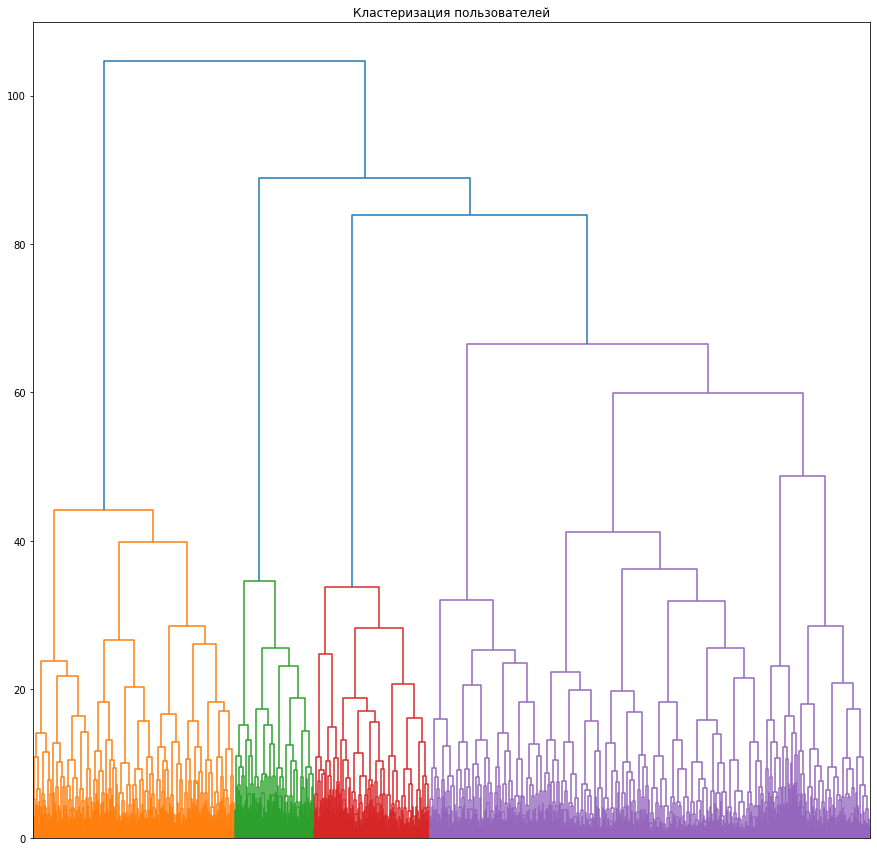

In [27]:
plt.figure(figsize=(15, 15))  
dendrogram(for_graph_gym_cluster, orientation = 'top', no_labels=True)
plt.title('Кластеризация пользователей')
plt.show()

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить. чите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [28]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(gym_cluster)
gym['cluster'] = labels

In [29]:
gym.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [30]:
gym.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


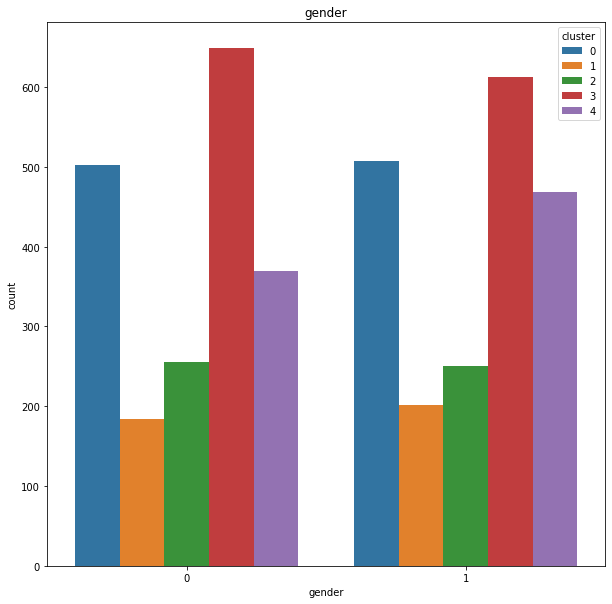

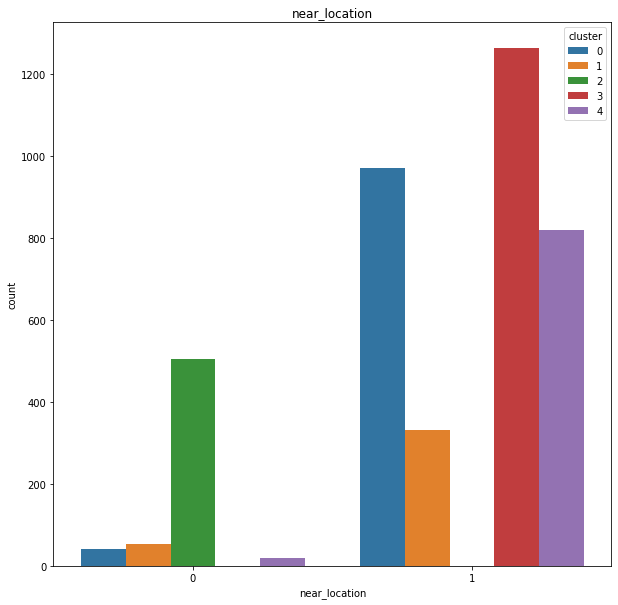

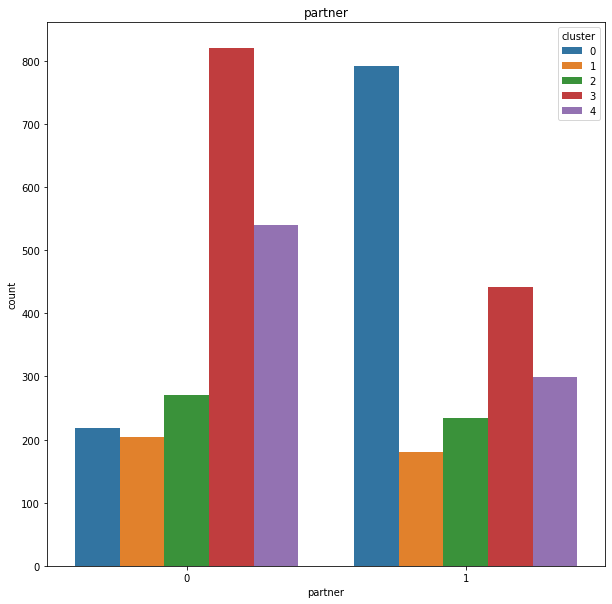

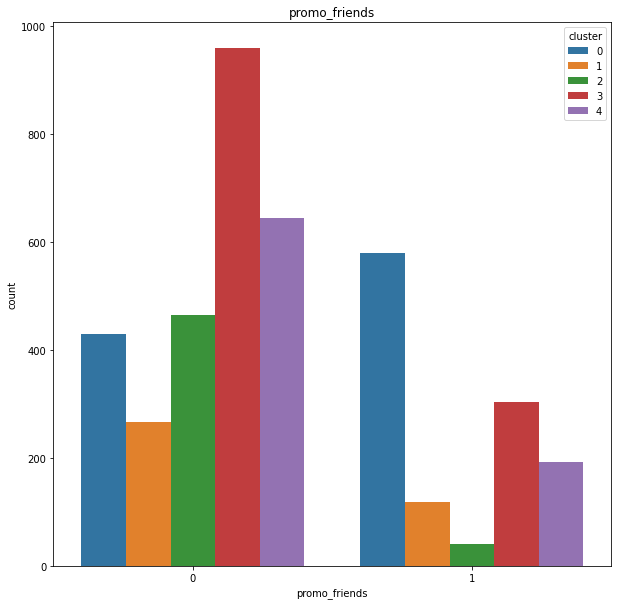

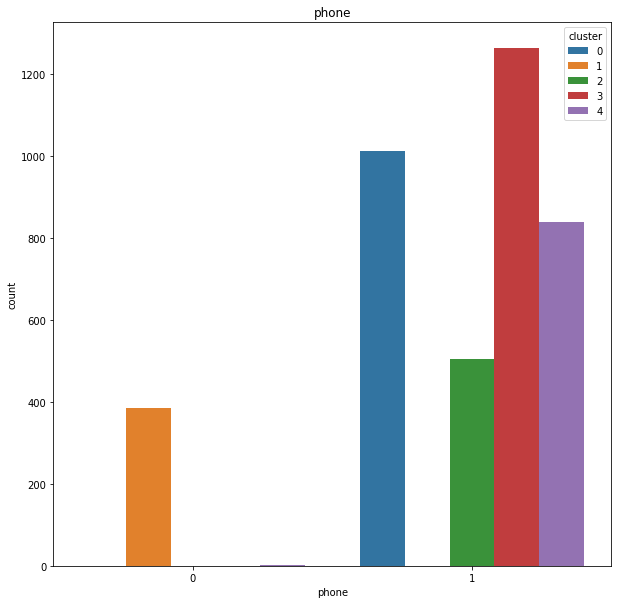

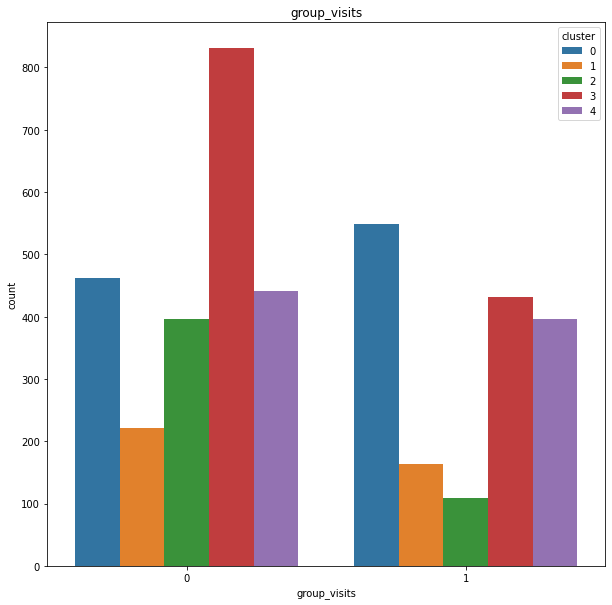

In [31]:
for col in categorical_columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x = gym[col], hue='cluster', data=gym)
    plt.title(col)
    plt.show()

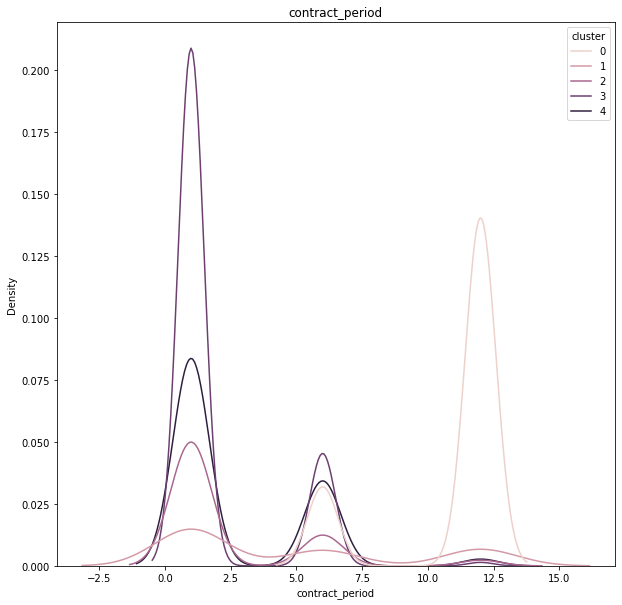

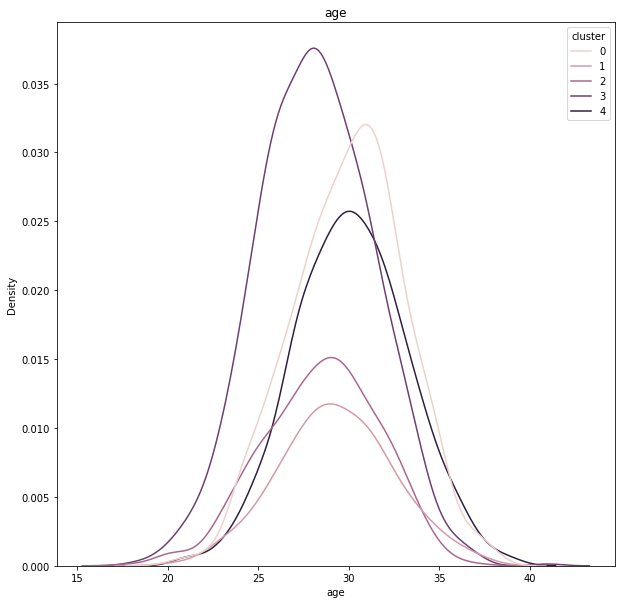

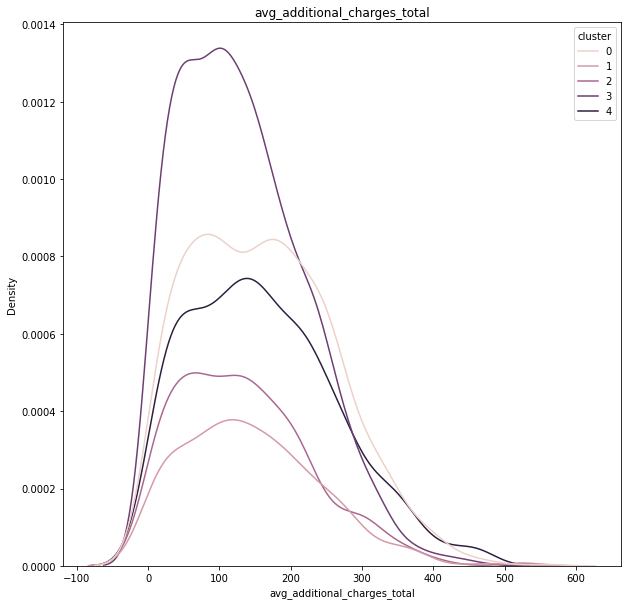

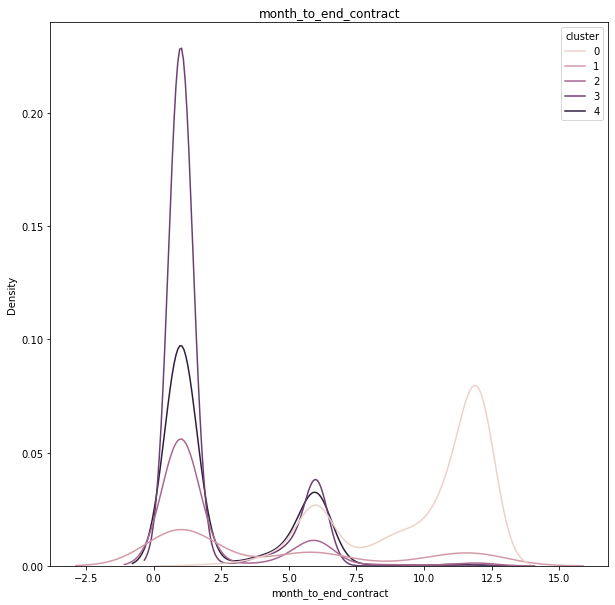

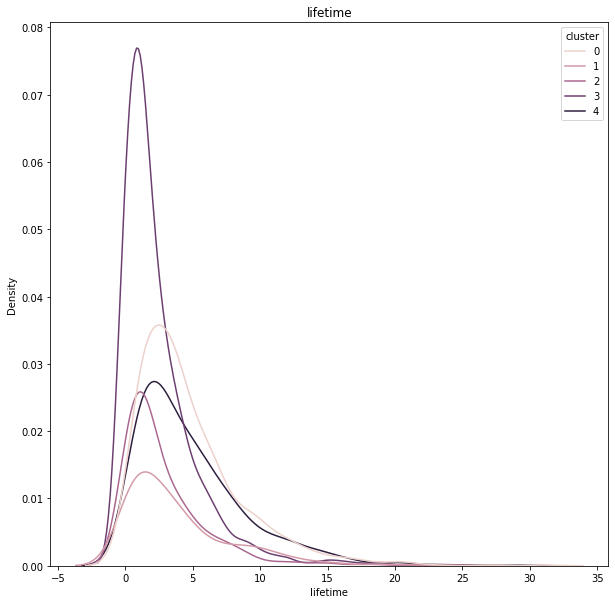

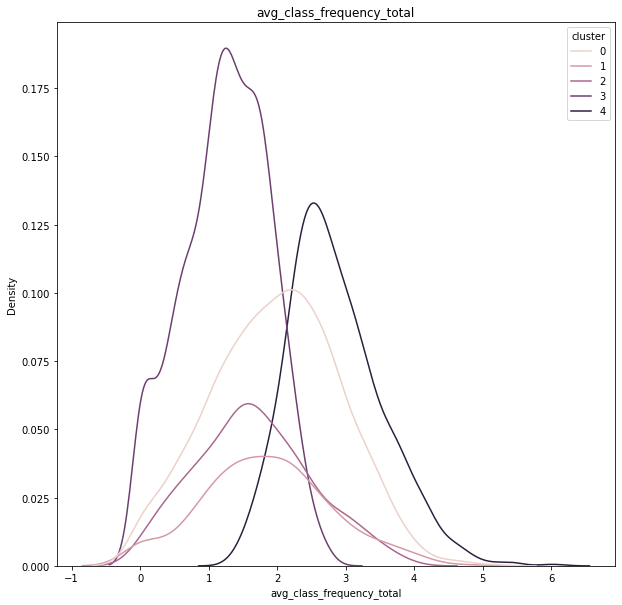

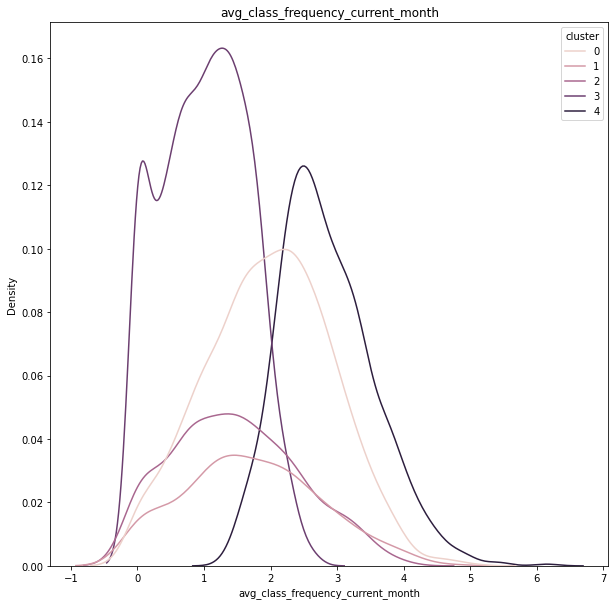

In [32]:
for col in numerical_values:
    plt.figure(figsize=(10, 10))
    sns.kdeplot(x = gym[col], hue='cluster', data=gym)
    plt.title(col)
    plt.show()

**Кластер 0:** Подавляющее большинство клиентов живут недалеко от фитнес-центра, многие пришли заниматься по программе от компании-партнера, либо по приглашению от друзей. Обычно, клиенты из этого кластера заключают контракт на 12 месяцев, чуть более половины, при этом, посещают групповые занятия. Средний возраст клиентов из этого кластера около 30 лет, они активно пользуются дополнительными услугами фитнес-центра. До конца контракта остается в среднем около десяти месяцев, что, в свою очередь, мотивирует их продолжать тренировки. В среднем, клиенты из этого кластера посещают 2 тренировки в неделю, при этом, это динамика посещений вовсе не изменяется в предыдущем месяце. К этому кластеру относятся 1010 клиентов. Именно такая группа людей является наиболее лояльной к нашей компании, показывая минимальный уровень “оттока”.

**Кластер 1:** К данному кластеру относятся 385 клиентов. Отток составляет 27% процентов. Никто из этого кластера не оставил контактного номера. Довольно трудно делать какие-либо выводы по этому кластеру. Клиенты живут близко к фитнес-центру, многие пришли по партнерской программе, либо по приглашению друга. Контракт, в среднем, заключается на несколько месяцев. 

**Кластер 2:** К данному кластеру относятся 505 клиентов и в нём наблюдается высокий уровень “оттока”, 44%. Думаю, что основной причиной является то, что все клиенты из этого кластера живут далеко от фитнес-центра. Средний возраст клиентов около 28 лет. Работа, усталость, у многих уже есть семьи, и после всего этого нужно куда-то далеко ехать, чтобы 40 минут потренироваться на беговой дорожке и сделать несколько подходов жима лёжа. Тем более, многие клиенты из этого кластера заключали контракт на небольшой срок, преимущественно месяц, либо полгода. Менее четверти клиентов посещают групповые тренировки, до конца контракта в среднем остаются около двух месяцев. Довольно очевидно, почему в этом кластере происходит “тихий отток” клиентов.

**Кластер 3:** Наиболее многочисленный (1262) кластер с максимальным уровнем “оттока”, 51%. Все клиенты из этого кластера живут близко, так в чем же проблема? Думаю, что это как раз люди, которые в среднем немного моложе, около 28 лет, которые изначально заключили контракт на малый срок. В среднем, они с самого начала посещали около одной тренировки в неделю, разве это серьезный подход к занятиям? До конца контракта, в среднем , остается менее двух месяцев, именно поэтому люди из этого кластера “отпускают” занятия спортом и перестают быть активными членами фитнес-центра. (С трудом можно сформировать какую-либо устойчивую привычку, занимаясь чем-либо лишь раз в неделю). 

**Именно этот кластер нужно “прокачивать” спецпредложениями, дополнительно мотивируя клиентов совершать большее количество тренировок. В таком случае, “отток” должен уменьшиться.** 

**Кластер 4:** К данному кластеру относится 838 клиентов, уровень оттока составляет 7%. Почти все клиенты живут близко, около трети пришли по программе от компании-партнера, чуть меньше по акции “Пригласи друга”, контракт заключают, в среднем, на небольшой срок, при этом около половины клиентов посещают групповые занятия. Средний возраст клиентов около 30 лет, также, в этом кластере можно отметить наиболее высокую степень посещаемости (около 3х занятий в неделю). Думаю, что именно вовлеченность в групповые тренировки обеспечивает такой высокий уровень посещаемости. Также, в этом кластере наблюдается заинтересованность клиентов в дополнительных услугах фитнес-центра. 

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()).

### Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [33]:
display(gym.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn'))
display(gym.cluster.value_counts())

,churn
cluster,
0,0.03
4,0.07
1,0.27
2,0.44
3,0.51


3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

### сделать промежуточные выводы

Нами было выявлено пять кластеров клиентов фитнес-центра на четвертом шаге нашего исследования. Каждый из этих кластеров по разному характеризует портрет клиента из разных групп. Наибольший “отток” происходит в 3ем (51%) и 2ом (44%) кластерах.
Такие “неблагополучные” кластеры характеризуются тем, что клиенты в них совершают меньше групповых посещений, ходят на меньшее количество тренировок, живут далеко от фитнес-центра, не приходят от компаний-партнеров, либо по приглашению друзей. У них меньше “якорей”, которые бы мотивировали их чаще добираться до спорт-зала, именно поэтому для них нужно разрабатывать больше специальных предложений, которые бы помогали им сохранять достаточную степень мотивации для продолжения тренировок.

# Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

В начале нашего исследования, во время подготовки данных были импортированы все необходимые библиотеки. После этого мы подгрузили документ /datasets/gym_churn.csv, с которым первично ознакомились. Таблица состоит из 14 столбцов и 4000 строк. В данной таблице оказались сведения о поле клиентов, близости проживания, компании-партнере, участия в акции “Приведи друга”, телефонном номере, периоде действия контракта, посещении групповых занятий, возрасте, дополнительных списаниях, количестве месяцев до окончания действия контракта, времени, с момента первого обращения в фитнес-центр, средней частоте посещений зала в неделю, суммарной выручке от других услуг фитнес-центра, а также факт оттока в текущем месяце. После этого мы выяснили, что пропущенные значения в таблице отсутствуют, также как и дубликаты. Столбцы в таблице были приведены к единому стилю. Типы данных в столбцах были изменены для удобства дальнейшей работы.

Данные были подготовлены для дальнейшей работы.

Дальше, во время проведения исследовательского анализа мы выяснили, что:
- пол клиента не влияет на отток клиентов
- клиенты, которые живут близко проявляют больше лояльности и остаются с компанией
- клиенты от компаний-партнёров дольше остаются с компанией
- клиенты, которых пригласили друзья более лояльно относятся к компании
- наличие контактного телефона клиента не влияет на отток
- клиенты, у которых контракт заключён на больший срок продолжают свои тренировки и остаются с компанией
- клиенты, посещающие групповые тренировки более лояльно относятся к компании
- средний возраст людей, которые попадают в “отток” чуть меньше среднего возраста людей, которые остаются с компанией
- люди, которые остаются с компанией в среднем приносят больше выручки, приобретая дополнительные услуги фитнес-центра
- в среднем, у клиентов, которые остаются с фитнес-центров остаётся около пяти месяцев до окончания контракта, в то время как у клиентов, которые попадают в “отток” остаётся в среднем около полутора месяцев до окончания контракта
- с клиентами, которые остаются с компанией поддерживается более долгая “история взаимодействия”, в среднем, около 5ти месяцев. Клиенты, которые останавливают действие своего контракта, либо перестают пользоваться сервисом “тихо” взаимодействуют с компанией в среднем около одного месяца.
- клиенты остающиеся с компанией чаще посещают различные тренировки. Клиенты, которые попадают в отток проявляют чуть меньшую активность.
- у клиентов, которые попадают в “отток” заметно падает средняя частота посещений в неделю за предыдущий месяц.

Также, из матрицы корреляций мы можем сделать выводы о том, что:
- наибольшее влияние на целевую переменную “churn” оказывает то, близко ли находится фитнес-центр от клиента, либо ему приходится долго добираться до зала. 
- также, мы обратили внимание на мультиколлинеарные признаки, от одного из которых в каждой паре нужно избавиться (avg_class_frequency_total/avg_class_frequency_current_month, month_to_end_contract/contract_period).

*Дополнительно, я заметил следующую взаимосвязь. Сотрудники компаний-партнёров клуба чаще приводят новых клиентов по акции “Пригласи друга”.

Во время построения модели прогнозирования оттока клиентов мы выяснили, что:
- на основании метрик модель логистической регрессии показала себя лучше, так как она чуть превосходит модель “Случайный лес” по всем параметрам (Accuracy, precision, recall).

Нами было выявлено пять кластеров клиентов фитнес-центра на четвертом шаге нашего исследования. Каждый из этих кластеров по разному характеризует портрет клиента из разных групп. Наибольший “отток” происходит в 3ем (51%) и 2ом (44%) кластерах. 

Такие “неблагополучные” кластеры характеризуются тем, что клиенты в них совершают меньше групповых посещений, ходят на меньшее количество тренировок, живут далеко от фитнес-центра, не приходят от компаний-партнеров, либо по приглашению друзей. У них меньше “якорей”, которые бы мотивировали их чаще добираться до спорт-зала, именно поэтому для них нужно разрабатывать больше специальных предложений, которые бы помогали им сохранять достаточную степень мотивации для продолжения тренировок.

Примеры специальных предложений, которые можно проводить для такого рода клиентов:
- начисление “бонусных дней” при условии посещения 10ти тренировок в месяц (+1 неделя занятий к сроку действия абонемента).
- 3 бесплатных групповых занятия в месяц
- бесплатный массаж при условии посещения 2-3 тренировок в неделю на протяжении двух месяцев 

В целом, перед нами была поставлена задача по формированию типичных портретов клиентов (предварительно разбив их на наиболее яркие группы). Мы определили, что наиболее лояльными остаются люди возрастом около 29 лет, которые регулярно посещаются тренировки, пришли от компании-партнера, либо по приглашению от друга, живут недалеко от фитнес-центра, посещают групповые тренировки. 

Меры, которые будут способствовать снижению “оттока”:
- необходимо уделять больше вниманию группам клиентов, в которых происходит большая доля “оттока”
- создавать специальные предложения для таких групп клиентов, которые будут помогать им поддерживать мотивацию для посещения тренировок
- возможно, делать “теплый провод” клиентов, узнавая, что с ними случилось, и почему они в последнее время пропускают занятия. (Думаю, что клиентам будет приятно, и такого рода напоминания заставят их в лишний раз задуматься о посещении зала).